In [30]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [31]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [32]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [33]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [34]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(autoload_with=engine)

In [35]:
# View all of the classes that automap found
base.classes.keys()

['station', 'measurement']

In [36]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [37]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [38]:
# Find the most recent date in the data set.
latest_date = session.query(func.max(measurement.date)).first()
latest_date

('2017-08-23',)

Text(0, 0.5, 'Inches')

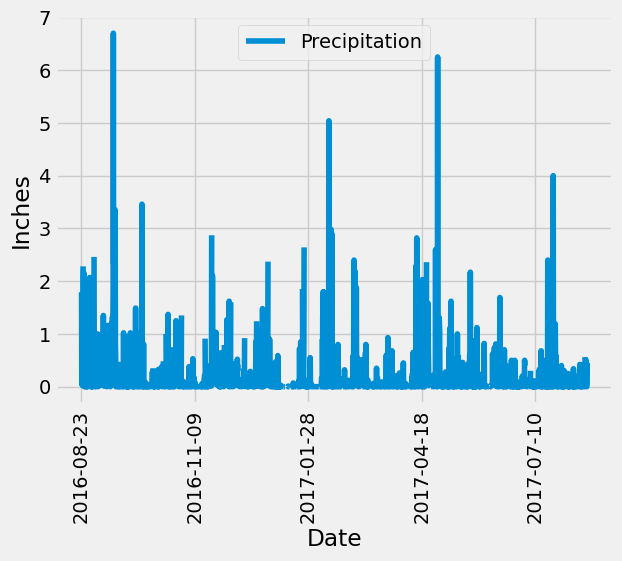

In [39]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(measurement.date, measurement.prcp).filter(measurement.date >= prev_year)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(results, columns = ["Date", "Precipitation"])

# Sort the dataframe by date
df = df.sort_values("Date")

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x = "Date", y = "Precipitation", rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")

In [40]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [41]:
# Design a query to calculate the total number of stations in the dataset
num_of_stations = session.query(func.count(station.station)).all()
num_of_stations

[(9,)]

In [42]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(measurement.station, func.count(measurement.station)).\
                group_by(measurement.station).\
                order_by(func.count(measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [43]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station =='USC00519281')

most_active.first()

(54.0, 85.0, 71.66378066378067)

In [44]:
# Find the most recent date in the data set.
# Using the most active station id
# Query the last 12 months of temperature observation data for this station

latest_date2 = session.query(func.max(measurement.tobs, measurement.date)).filter(measurement.station == 'USC00519281').first()
latest_date2

('2010-01-01',)

In [45]:
# Calculate the date one year from the last date in data set.
year_stats = dt.date(2010, 1, 1) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
stats_results = session.query(measurement.tobs, measurement.date).filter(measurement.date >= year_stats).filter(measurement.station == 'USC00519281')

stats_results.first()

(70.0, '2010-01-01')

In [46]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
df2 = pd.DataFrame(stats_results, columns = ['tobs', 'date'])

df2.head()

,tobs,date
0,70.0,2010-01-01
1,62.0,2010-01-02
2,74.0,2010-01-03
3,75.0,2010-01-04
4,74.0,2010-01-05


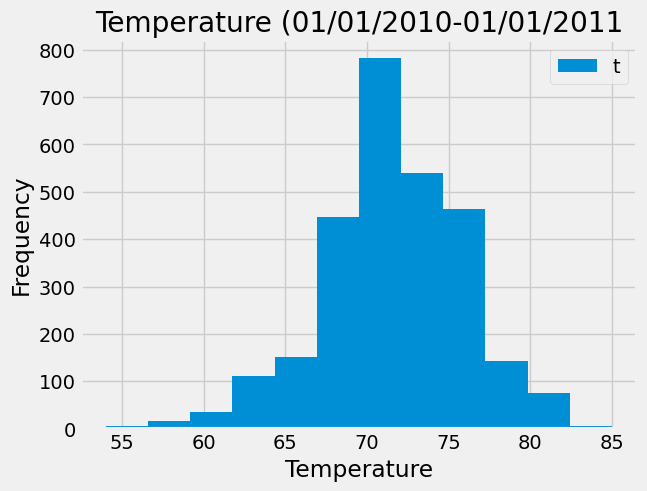

In [47]:
#plot the results as a histogram
hist_data = df2['tobs']
hist_data.hist(bins = 12)

plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature (01/01/2010-01/01/2011')
plt.legend('tobs')

plt.show()

# Close Session

In [48]:
# Close Session
session.close()